In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras.backend as K
K.clear_session()
nrow = 140
ncol = 140
image = np.zeros((nrow,ncol,3))
image_shape = np.shape(image)
image_shape

(140, 140, 3)

In [3]:
input_shape = image_shape
pre_trained = 'vgg16'
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import decode_predictions, preprocess_input    

base_model = applications.VGG16(weights='imagenet', include_top = False,input_shape= input_shape)

In [4]:
# Create a new model
model = Sequential()

#Loop over base_model.layers and add each layer to model
for layer in base_model.layers:
    model.add(layer)

In [5]:
# not have to re-train any of the existing layers
for i in range(len(model.layers)):
   model.layers[i].trainable=False

In [6]:
# add new layers
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6,activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 140, 140, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 140, 140, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 140, 140, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 70, 70, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 70, 70, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 70, 70, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 35, 35, 128)       0         
__________

In [8]:
train_data_dir = 'G:\\NYU\\2018 fall\\ECE6183 DSP LAB\\project\\datasets\\testpic'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='categorical')

Found 791 images belonging to 6 classes.


In [9]:
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

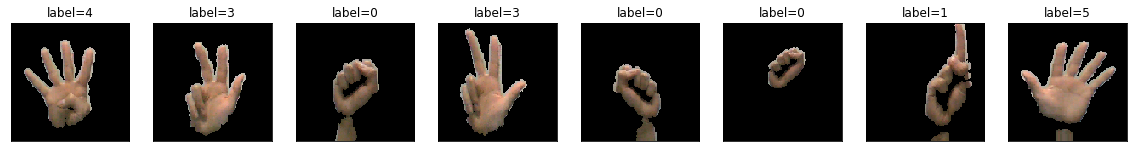

In [10]:
X,y = train_generator.next()
plt.figure(figsize=(20,20))
nplot = 8
for i in range(nplot):
    plt.subplot(1,nplot,i+1)
    yl = y[i].tolist().index(1)
    disp_image(X[i,:,:,:])
    title = 'label={0:d}'.format(yl)
    plt.title(title)

In [11]:
# train model
opt = optimizers.Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0) 
# beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
# get the training and test data size
steps_per_epoch =  train_generator.n // batch_size

In [13]:
nepochs = 5  # Number of epochs

# Call the fit function
model.fit_generator(train_generator,steps_per_epoch=steps_per_epoch,epochs=nepochs)

Epoch 1/5
24/24 [==============================] - 137s - loss: 0.3134 - acc: 0.8752   
Epoch 2/5
24/24 [==============================] - 141s - loss: 0.1168 - acc: 0.9646   
Epoch 3/5
24/24 [==============================] - 157s - loss: 0.0653 - acc: 0.9852   
Epoch 4/5
24/24 [==============================] - 152s - loss: 0.0367 - acc: 0.9935   
Epoch 5/5
24/24 [==============================] - 148s - loss: 0.0320 - acc: 0.9946   


In [14]:
import os
model.save(os.path.join('G:\\NYU\\2018 fall\\ECE6183 DSP LAB\\project\\py', 'my_model.h5'))